In [89]:
### import libraries and packages
import numpy as np,pandas as pd,seaborn as sns,matplotlib.pyplot as plt
import plotly,plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

##Data processing fns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


##classifiers
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

## Model evaluation tools
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score


In [90]:
## Load the dataset
data=pd.read_csv("loan_prediction.csv")

In [91]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [92]:
data.shape

(614, 13)

In [93]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [95]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [96]:
data.describe(include="all")

Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   
mean         NaN    NaN     NaN        NaN       NaN           NaN   
std          NaN    NaN     NaN        NaN       NaN           NaN   
min          NaN    NaN     NaN        NaN       NaN           NaN   
25%          NaN    NaN     NaN        NaN       NaN           NaN   
50%          NaN    NaN     NaN        NaN       NaN           NaN   
75%          NaN    NaN     NaN        NaN       NaN           NaN   
max          NaN    NaN     NaN        NaN       NaN           NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count        614.000000         614.000000  592.000000         600.00000   
unique              NaN                NaN         NaN               NaN   
top                 NaN                NaN         NaN               NaN   
freq                NaN                NaN         NaN               NaN   
mean        5403.459283        1621.245798  146.412162         342.00000   
std         6109.041673        2926.248369   85.587325          65.12041   
min          150.000000           0.000000    9.000000          12.00000   
25%         2877.500000           0.000000  100.000000         360.00000   
50%         3812.500000        1188.500000  128.000000         360.00000   
75%         5795.000000        2297.250000  168.000000         360.00000   
max        81000.000000       41667.000000  700.000000         480.00000   

        Credit_History Property_Area Loan_Status  
count       564.000000           614         614  
unique             NaN             3           2  
top                NaN     Semiurban           Y  
freq               NaN           233         422  
mean          0.842199           NaN         NaN  
std           0.364878           NaN         NaN  
min           0.000000           NaN         NaN  
25%           1.000000           NaN         NaN  
50%           1.000000           NaN         NaN  
75%           1.000000           NaN         NaN  
max           1.000000           NaN         NaN

### Study->Categorical attributes

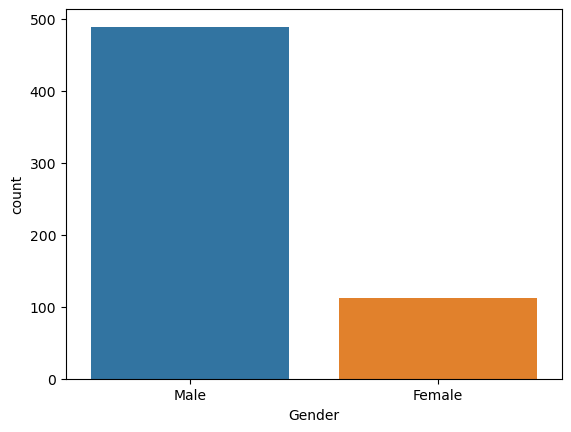

In [97]:
sns.countplot(x="Gender", data=data)
plt.show()

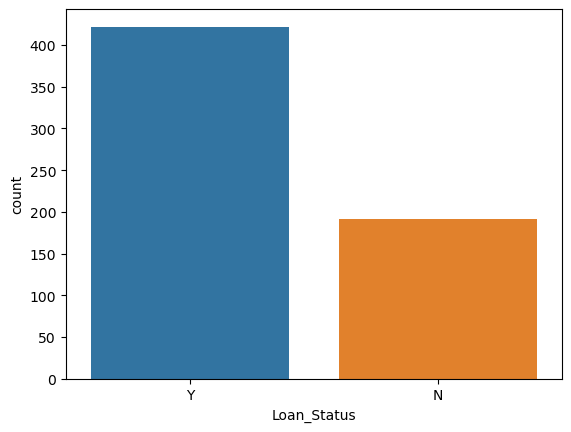

In [98]:
sns.countplot(x="Loan_Status", data=data)
plt.show()

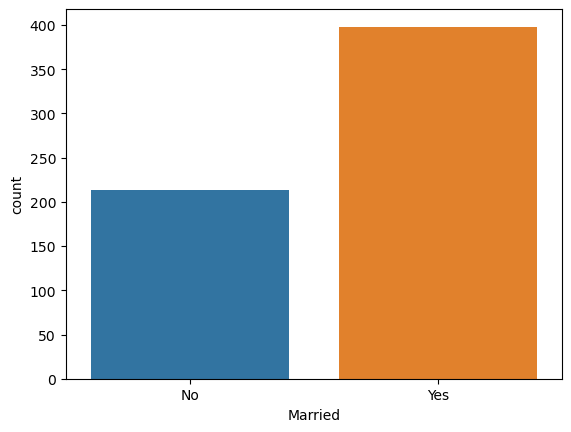

In [99]:
sns.countplot(x="Married", data=data)
plt.show()

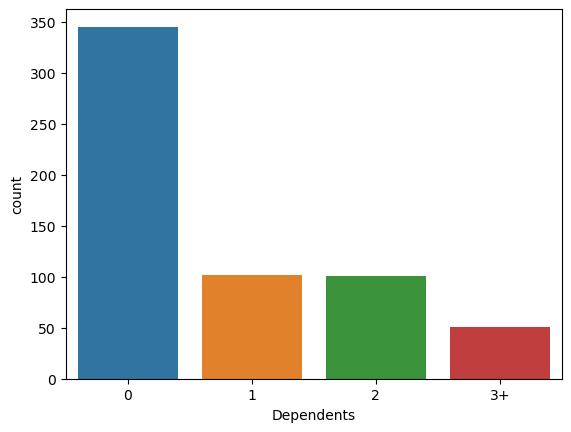

In [100]:
sns.countplot(x="Dependents", data=data)
plt.show()

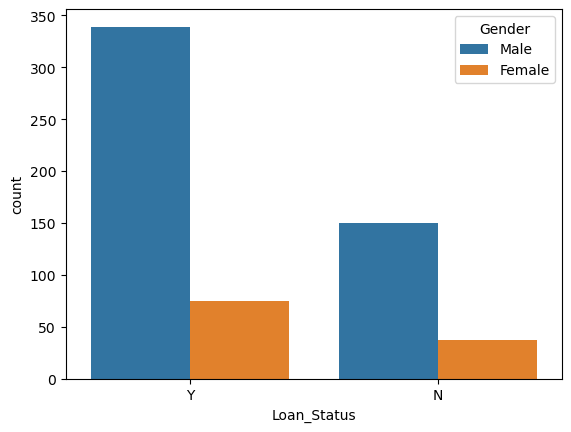

In [101]:
sns.countplot(x="Loan_Status", hue="Gender", data=data)
plt.show()

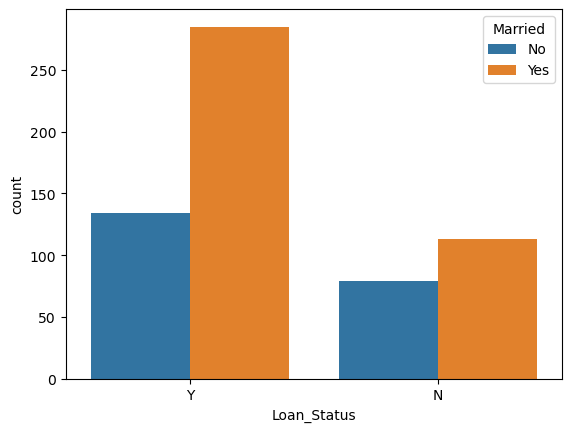

In [102]:
sns.countplot(x="Loan_Status", hue="Married", data=data)
plt.show()

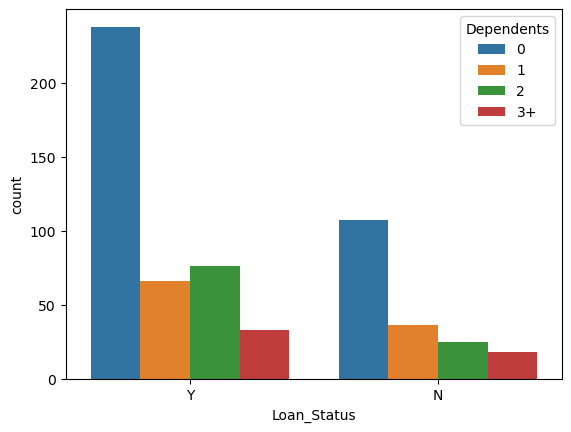

In [103]:
sns.countplot(x="Loan_Status",hue="Dependents",data=data)
plt.show()

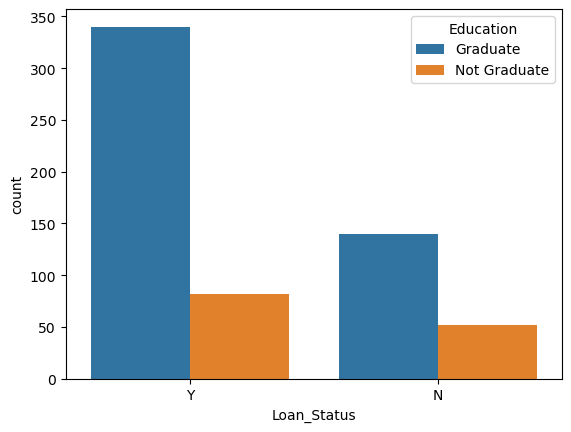

In [104]:
sns.countplot(x="Loan_Status",hue="Education",data=data)
plt.show()

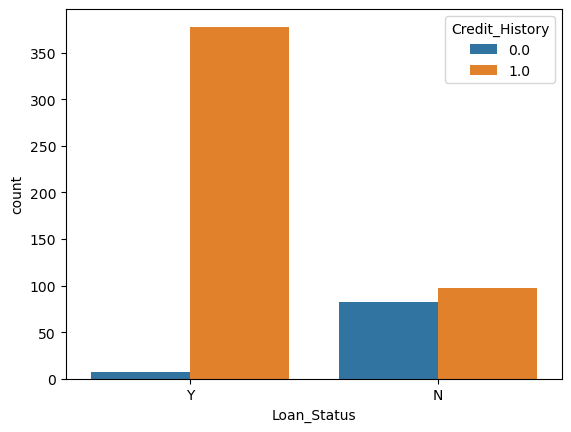

In [105]:
sns.countplot(x='Loan_Status',hue='Credit_History',data=data)
plt.show()

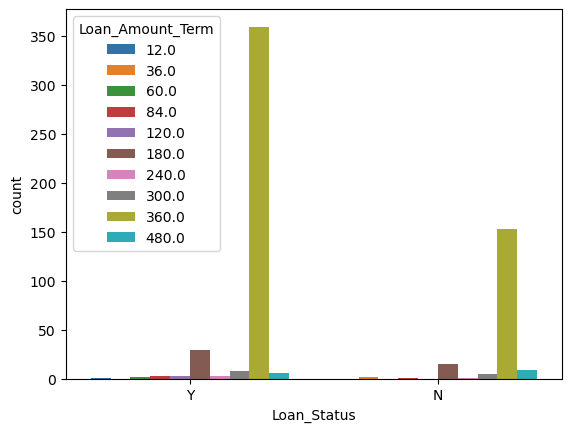

In [106]:
sns.countplot(x="Loan_Status", hue="Loan_Amount_Term", data=data)
plt.show()

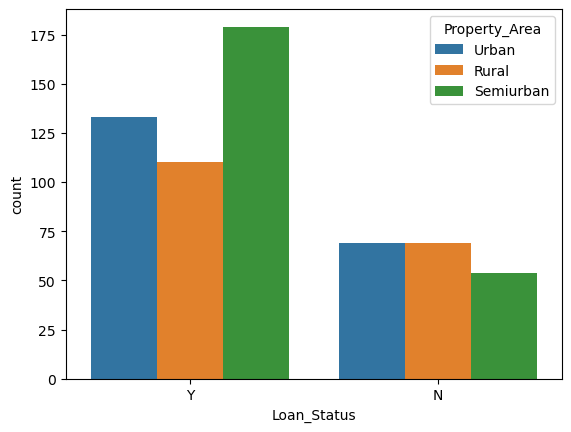

In [107]:
sns.countplot(x='Loan_Status',hue='Property_Area',data=data)
plt.show()

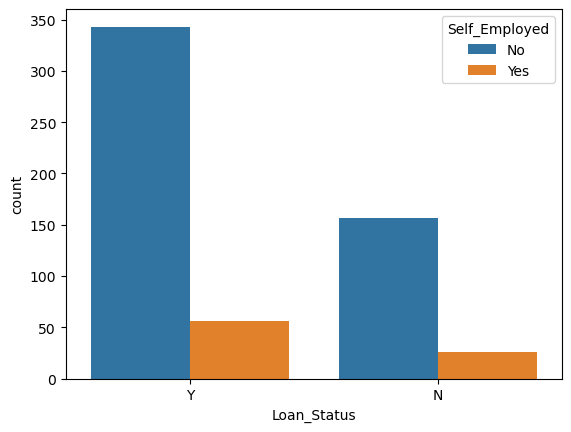

In [108]:
sns.countplot(hue="Self_Employed",x="Loan_Status",data=data)
plt.show()

### Numerical attribute w.r.t loan_status

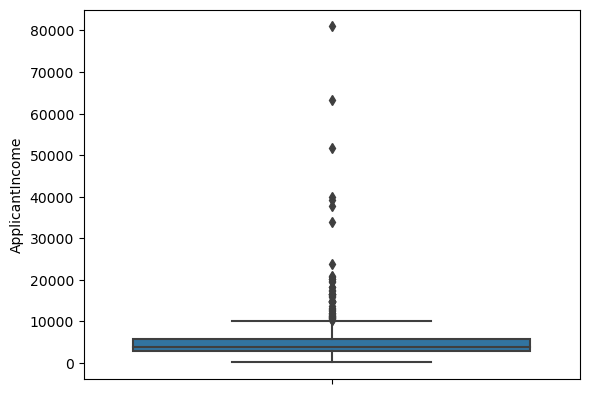

In [109]:
sns.boxplot(y="ApplicantIncome", data=data)
plt.show()

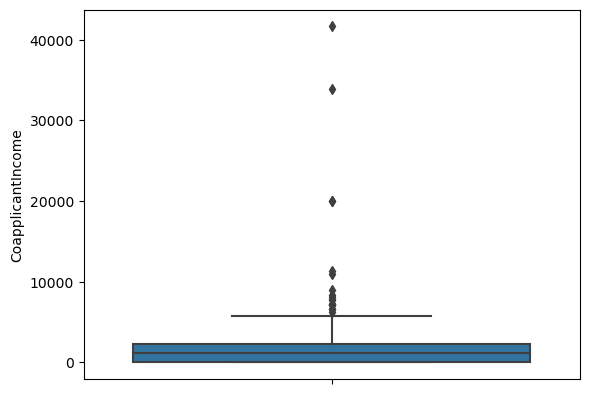

In [110]:
sns.boxplot(y="CoapplicantIncome", data=data)
plt.show()

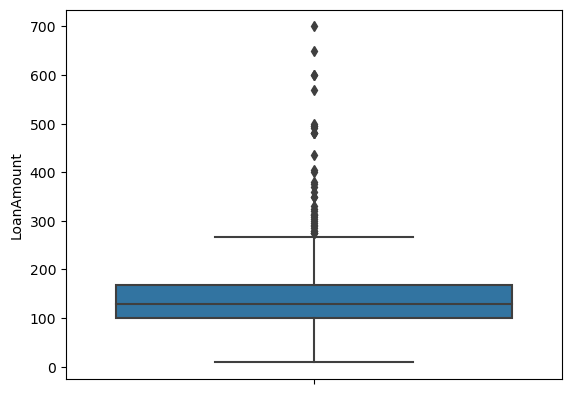

In [111]:
sns.boxplot(y="LoanAmount", data=data)
plt.show()

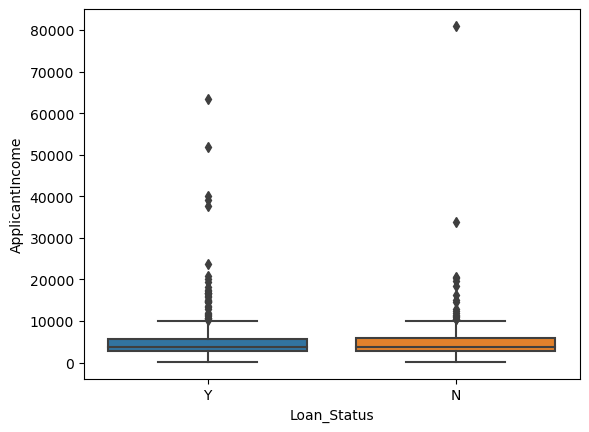

In [112]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=data)
plt.show()

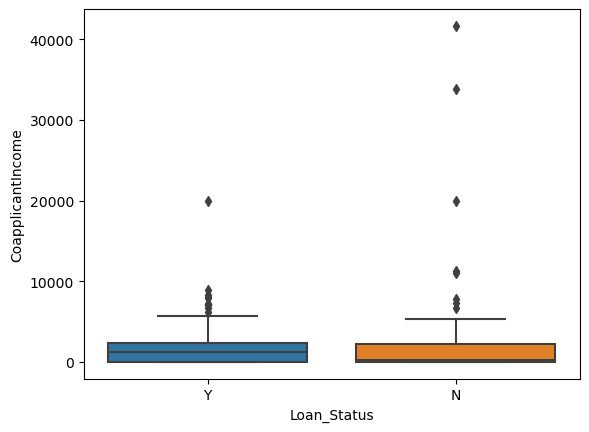

In [113]:
sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=data)
plt.show()

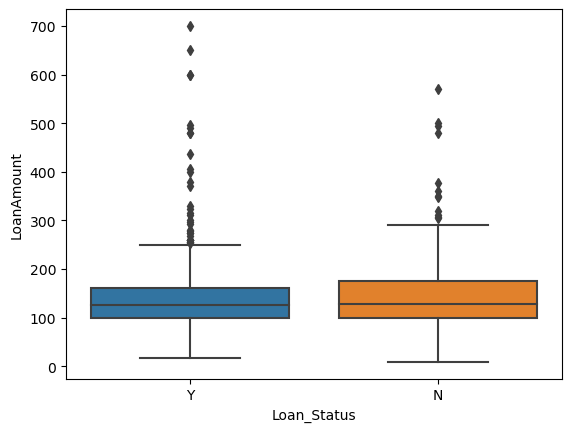

In [114]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=data)
plt.show()

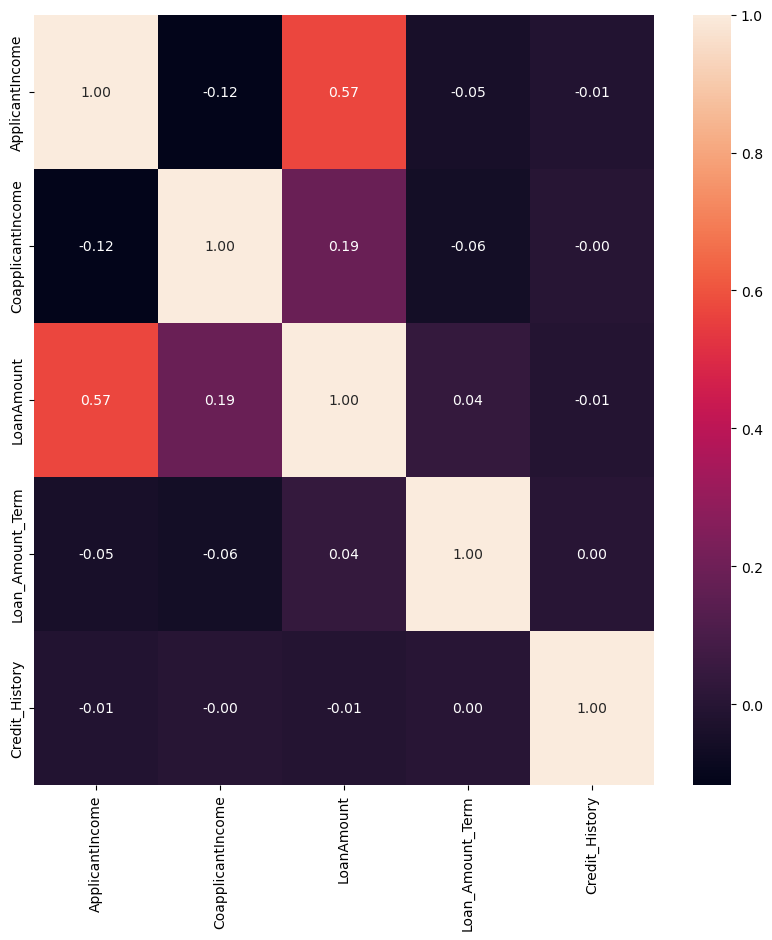

In [115]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt="0.2f")
plt.show()

In [116]:
#sns.pairplot(data,hue="Loan_Status")

### Normally distributed or not?

In [117]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

##### The above shows that data is skewed

In [118]:
print(np.mean(data["ApplicantIncome"]))
print(np.median(data["ApplicantIncome"]))
print(stats.mode(data["ApplicantIncome"])[0])

5403.459283387622
3812.5
[2500]


##### Mean ,median,mode are not equal-> so not normally distributed

In [119]:
print(np.mean(data["CoapplicantIncome"]))
print(np.median(data["CoapplicantIncome"]))
print(stats.mode(data["CoapplicantIncome"])[0])

1621.2457980271008
1188.5
[0.]


In [120]:
print(np.mean(data["LoanAmount"]))
print(np.median(data["LoanAmount"]))
print(stats.mode(data["LoanAmount"])[0])

146.41216216216216
nan
[nan]


In [121]:
print(np.std(data["ApplicantIncome"]))
print(np.std(data["CoapplicantIncome"]))
print(np.std(data["LoanAmount"]))

6104.064856533888
2923.8644597700627
85.51500809120331


In [122]:
fig=px.histogram(data["ApplicantIncome"],x="ApplicantIncome",y="ApplicantIncome")
fig.update_layout(title="ApplicantIncome")
fig.show()

fig=px.histogram(data["CoapplicantIncome"],x="CoapplicantIncome",y="CoapplicantIncome")
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig=px.histogram(data['LoanAmount'],x='LoanAmount',y='LoanAmount')
fig.update_layout(title='LoanAmount')
fig.show()

### Missing values

In [123]:
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)


data["Dependents"]=data["Dependents"].replace('3+',int(3))
data["Dependents"]=data["Dependents"].replace('1',int(1))
data["Dependents"]=data["Dependents"].replace('2',int(2))
data["Dependents"]=data["Dependents"].replace('0',int(0))

In [124]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [125]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [126]:
data["Gender"]=le.fit_transform(data["Gender"])
data["Married"] = le.fit_transform(data["Married"])
data["Education"] = le.fit_transform(data["Education"])
data["Self_Employed"] = le.fit_transform(data["Self_Employed"])
data["Property_Area"] = le.fit_transform(data["Property_Area"])
data["Loan_Status"] = le.fit_transform(data["Loan_Status"])


In [127]:
data.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [128]:
X=data.drop(["Loan_Status","Loan_ID"],axis=1)
y=data["Loan_Status"]

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

##### All the models

In [130]:
### Tweak the hyperparameters-> KNN,svm->kernel,c,gamma,DT-> n_estimators,max_depth

In [131]:
model_svc=SVC()

In [132]:
kernel=["rbf","poly","sigmoid"]
C=[50,10,0.1,1.0,0.01]
gamma=["scale","auto"]

In [133]:
grid=dict(kernel=kernel,C=C,gamma=gamma)

In [134]:
cv=RepeatedStratifiedKFold(n_splits=10)

In [135]:
grid_search=GridSearchCV(estimator=model_svc,param_grid=grid,cv=cv,scoring="accuracy")

In [136]:
grid_result=grid_search.fit(X,y)


KeyboardInterrupt



In [ ]:
### KNN

In [137]:
model_knn=KNeighborsClassifier()

In [139]:
leaf_size=list(range(1,50))
n_neighbors=list(range(1,50))
p=[1,2]
hyperparameters=dict(leaf_size=leaf_size,n_neighbors=n_neighbors,p=p)

In [140]:
clf=GridSearchCV(model_knn,hyperparameters,cv=10)

In [141]:
grid_knn=clf.fit(X_train,y_train)

In [142]:
print('Best leaf_size:', grid_knn.best_estimator_.get_params()['leaf_size'])
print('Best p:', grid_knn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', grid_knn.best_estimator_.get_params()['n_neighbors'])
LS = grid_knn.best_estimator_.get_params()['leaf_size']
P = grid_knn.best_estimator_.get_params()['p']
Num = grid_knn.best_estimator_.get_params()['n_neighbors']
KNN = KNeighborsClassifier(leaf_size=LS,p=P,n_neighbors=Num)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))

Best leaf_size: 1
Best p: 1
Best n_neighbors: 20
              precision    recall  f1-score   support

           0       0.05      0.50      0.09         6
           1       0.98      0.69      0.81       179

    accuracy                           0.68       185
   macro avg       0.51      0.59      0.45       185
weighted avg       0.95      0.68      0.78       185

KNeighborsClassifier:> 0.6810810810810811


In [ ]:
### decision tree-> max_depth